In [7]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, re, joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from konlpy.tag import Mecab

In [8]:
sentence = '게이 극혐'
mecab = Mecab()
columns = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '분쟁유발']
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','ㅋㅋ','ㅠㅠ','ㅎㅎ']
t = joblib.load('static/model/tokenizer.pkl')
max_len = 70
model = load_model('static/model/BiLSTM_LSTM.h5')

sentence = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', sentence)
morphs = mecab.morphs(sentence)
morphs = [word for word in morphs if word not in stopwords]
encoded = t.texts_to_sequences([morphs])
padded = pad_sequences(encoded, maxlen=max_len)
score = model.predict(padded)
max = 0
for i in range(len(score[0])):
    if score[0][i] >= score[0][max]:
        max = i
    else:
        continue
print(f'{score[0][max]*100}%의 확률로 {columns[max]}에 관한 댓글입니다.')

TypeError: morphs() got an unexpected keyword argument 'stem'

In [6]:
score[0]

array([3.5143886e-03, 3.5888064e-03, 4.3903993e-04, 2.0750621e-03,
       1.1873018e-03, 9.2312489e-03, 9.1807439e-04, 1.9166347e-03,
       1.2124028e-01, 8.5536379e-01, 5.2543893e-04], dtype=float32)

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 128)           1943424   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 256)          263168    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,209,162
Trainable params: 2,209,162
Non-trainable params: 0
_________________________________________________________________


In [47]:
max = 0
for i in range(len(score[0])):
    if score[0][i] >= score[0][max]:
        print(i, score[0][i])
        max = i
print(score[0][max])


0 0.010739244
1 0.059699323
2 0.7893477
0.7893477


In [19]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

def draw_graph(score):


    if platform.system() == "Darwin":  # 맥
        plt.rc('font', family='AppleGothic')
    elif platform.system() == "Windows":  # 윈도우
        plt.rc('font', family='Malgun Gothic')
    elif platform.system() == "Linux":  # 리눅스 = 코랩
        plt.rc('font', family='Malgun Gothic')

    columns = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '분쟁유발']

    matplotlib.rcParams['axes.unicode_minus'] = False
    lst = []
    for element in score:
        lst += element
    x = np.arange(len(lst))
    plt.figure(figsize=(12, 3))
    plt.rc('font', size = 6)
    plt.plot(x)
    plt.xticks(x, columns, rotation = 90)
    plt.xlabel('유형')
    plt.ylabel('확률')
    plt.legend()
    plt.show('static/img/comment_graph.png', bbox_inches='tight')
    plt.close()
    

In [30]:
lst = []
for element in score[0]:
        lst.append(element)
lst

[0.00028194074,
 1.7018077e-05,
 2.364712e-05,
 9.915189e-05,
 0.9926042,
 0.00031048697,
 1.740413e-05,
 4.8538608e-05,
 0.00600314,
 1.0080473e-05,
 0.00058439985]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


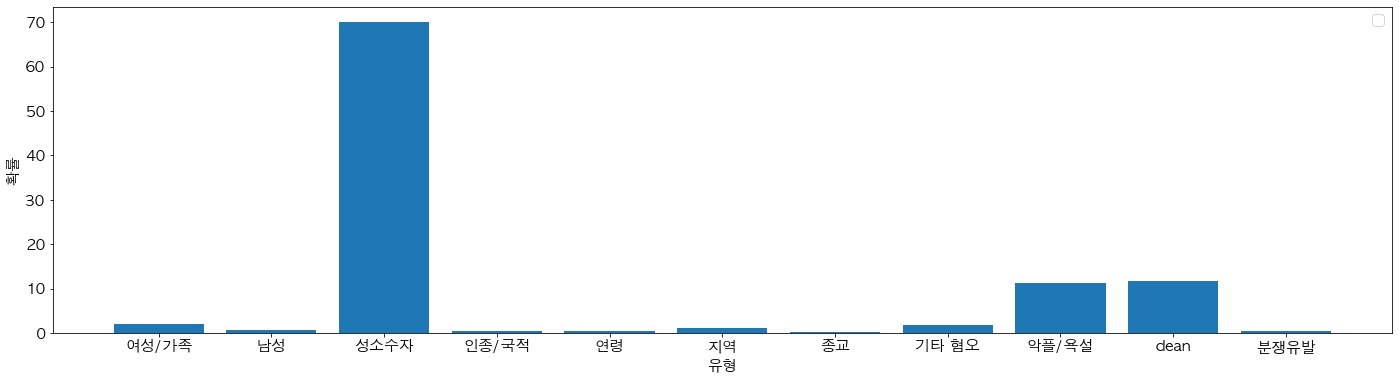

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

if platform.system() == "Darwin":  # 맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
        plt.rc('font', family='Malgun Gothic')

lst = []
for element in score[0]:
        lst.append(element*100)

x = np.arange(len(lst))
plt.figure(figsize=(24, 6))
plt.bar(x, lst)
plt.xticks(x, columns)
plt.rc('font', size = 15)

# plt.xticks(x, columns, rotation = 90)
plt.xlabel('유형')
plt.ylabel('확률')
plt.legend()
plt.show()
plt.close()